In [1]:
from dolfin import *
import matplotlib.pyplot as plt
from numpy.polynomial.legendre import leggauss
import numpy as np
from ufl import tanh
import functions as f

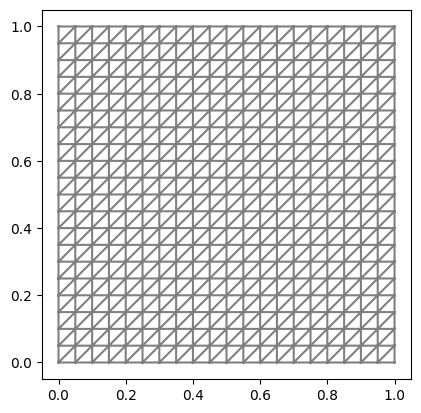

In [2]:
mesh = UnitSquareMesh(20,20)
plot(mesh)
V = FunctionSpace(mesh,"P",2)

In [4]:
# parameters
Dxc = 4.32*1e3
gamma = 4*Dxc
K_m = 0.0125
Dxn = 2.4*1e-3
Dsn = 1.2*1e-4
p_csc = 0.12
p_dc = 0.48
K_csc = 0.05
K_dc = 0.3 
g_csc = 0.1
g_dc = 0.2
g_tdc = 0.1
s_csc = 0
s_dc = 0.55
epsilon = 0.05
epsilon_k = 0.01
V_plus = 1.92*1e-2
V_minus = 0.48*1e-2
csi_plus = 0.1
csi_minus = 0.1
c_H = 0.3
c_N = 0.0125
c_R = 0.1
d_tdc = 0.024
d_n = 2.4
OER = 3
alpha_min = 0.007
delta_alpha = 0.143
beta_min = 0.002
delta_beta = 0.018
k=5

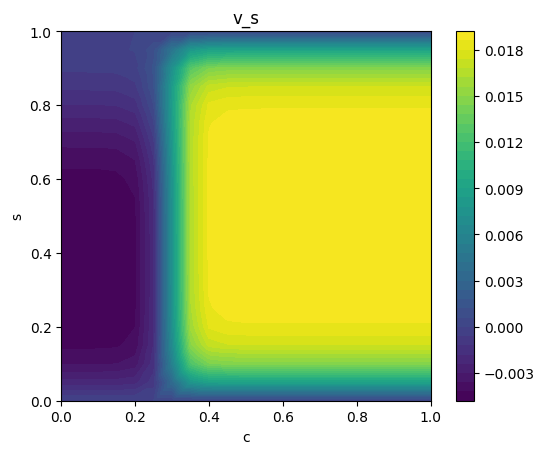

In [52]:
# advection velocity
vs = Expression('V_plus*tanh(x[1]/csi_plus)*tanh((1-x[1])/csi_plus)*(0.5+0.5*tanh((x[0]-c_H)*pow(epsilon,-1))) \
                - V_minus*tanh(x[1]/csi_minus)*tanh(pow(1-x[1],2)/csi_minus)*(0.5+0.5*tanh((c_H-x[0])*pow(epsilon,-1)))',
                V_plus=V_plus,V_minus=V_minus,csi_minus=csi_minus,csi_plus=csi_plus,c_H=c_H,epsilon=epsilon,degree=2)
vs = interpolate(vs,V)
sol = plot(vs)
plt.colorbar(sol)
plt.xlabel('c')
plt.ylabel('s')
plt.title('v_s')
plt.show()

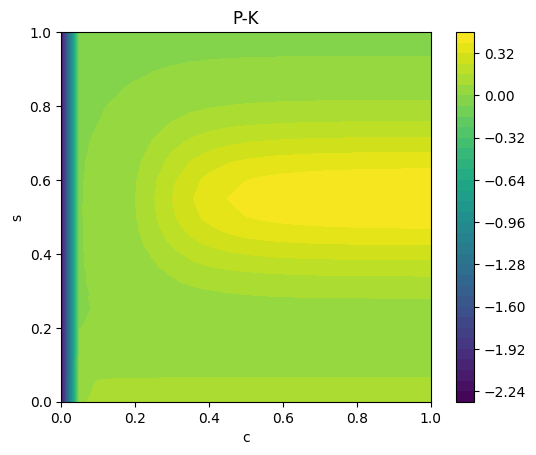

In [53]:
# Proliferation and death
P = Expression('p_csc*pow(x[0],4)/(pow(K_csc,4)+pow(x[0],4))*exp(-pow((x[1]-s_csc)/g_csc,2)) \
               + p_dc*pow(x[0],4)/(pow(K_dc,4)+pow(x[0],4))*exp(-pow((x[1]-s_dc)/g_dc,2))',
               p_csc=p_csc,p_dc=p_dc,K_csc=K_csc,K_dc=K_dc,g_csc=g_csc,g_dc=g_dc,s_csc=s_csc,s_dc=s_dc,degree=2)
K = Expression('d_tdc * exp(-((1-x[1])/g_tdc)) + d_n * (0.5 + 0.5*tanh((c_N-x[0])/epsilon_k))',
               d_tdc=d_tdc,d_n=d_n,g_tdc=g_tdc,epsilon_k=epsilon_k,c_N=c_N,degree=2)
F = Expression("P-K", degree=2, P=P, K=K)
F = interpolate(F,V)
sol = plot(F)
plt.colorbar(sol)
plt.xlabel('c')
plt.ylabel('s')
plt.title('P-K')
#plt.axvline(c_N,color='r')
plt.show()

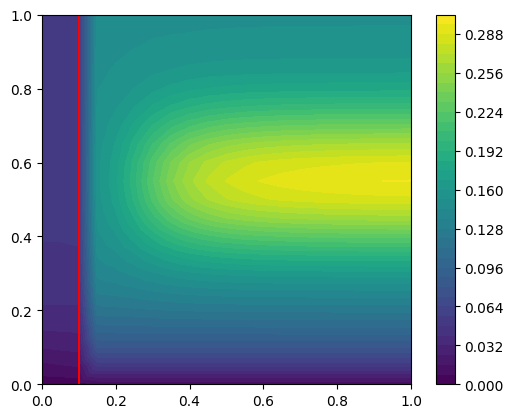

In [54]:
# radiotherapy
P = Expression('(p_csc*pow(x[0],4)/(pow(K_csc,4)+pow(x[0],4))*exp(-pow((x[1]-s_csc)/g_csc,2)) \
               + p_dc*pow(x[0],4)/(pow(K_dc,4)+pow(x[0],4))*exp(-pow((x[1]-s_dc)/g_dc,2)))*(1-phi)',
               p_csc=p_csc,p_dc=p_dc,K_csc=K_csc,K_dc=K_dc,g_csc=g_csc,g_dc=g_dc,s_csc=s_csc,s_dc=s_dc,phi=0,degree=2)
a1 = Expression('(x[0] > c_R) ? 1 : 1/OER',c_R=c_R,OER=OER,degree=2)
a2 = Expression('alpha_min + delta_alpha*tanh(k*x[1])',alpha_min=alpha_min,delta_alpha=delta_alpha,k=5,degree=2)
a3 = Expression('1+P/Pmax', P=P,Pmax=p_dc,degree=2)
a = Expression('a1*a2*a3',a1=a1,a2=a2,a3=a3,degree=4)
a = interpolate(a,V)
sol = plot(a)
plt.colorbar(sol)
plt.axvline(c_R,color='r')

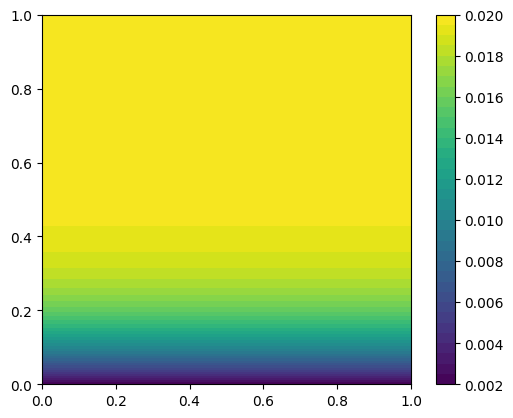

In [55]:
b2 = Expression('beta_min + delta_beta*tanh(k*x[1])',beta_min=beta_min,delta_beta=delta_beta,k=5,degree=2)
b2 = interpolate(b2,V)
plot(b2)
plt.colorbar(plot(b2))

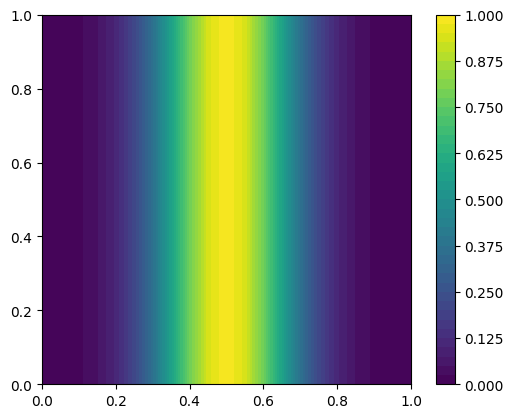

In [56]:
Vc = Expression('exp(-(x[0]-0.5)*(x[0]-0.5)/(sigma_v*sigma_v))',sigma_v = 0.2,degree=2)
Vc = interpolate(Vc,V)
plot(Vc)
plt.colorbar(plot(Vc))

In [57]:


f1 = Expression('gamma*(0.5+0.5*tanh((x[0]-c_N)/0.05))',gamma=gamma,c_N=c_N,degree=2)
f2 = Expression('gamma*x[0]/(x[0]+K_m)',gamma=gamma,K_m=K_m1,degree=2)
f3 = Expression('gamma*x[0]/(x[0]+K_m)',gamma=gamma,K_m=K_m2,degree=2)
f4 = Expression('gamma*x[0]/(x[0]+K_m)',gamma=gamma,K_m=K_m3,degree=2)



NameError: name 'K_m1' is not defined

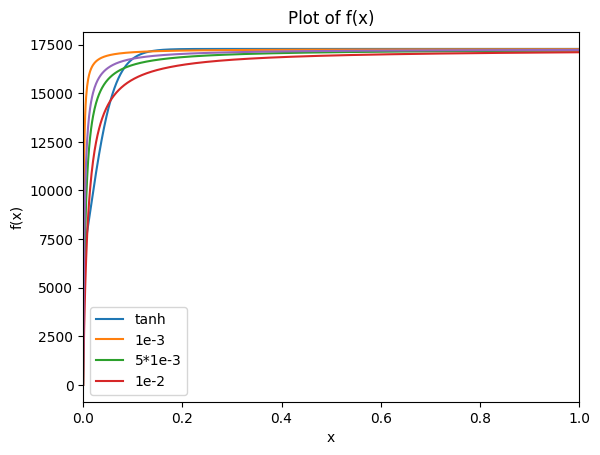

6523.9027568319525 0.0 0.0 0.0 0.0


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the function
def f1(x):
    return gamma*(0.5+0.5*np.tanh((x-c_N)/0.05))

def f2(x,K_m):
    return gamma*x/(x+K_m)

# Generate x values
x = np.linspace(0, 1, 1000)

K_m1 = 1e-3
K_m2 = 5*1e-3
K_m3 = 1e-2
K_m4 = 3*1e-3

# Calculate y values
y1 = f1(x)
y2 = f2(x,K_m1)
y3 = f2(x,K_m2)
y5 = f2(x,K_m4)
y4 = f2(x,K_m3)
# Plot the function
plt.plot(x, y1, x, y2, x, y3, x, y4, x, y5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x)')
plt.legend(['tanh','1e-3','5*1e-3','1e-2'])
plt.xlim([0,1])
#plt.ylim([14000,18000])
plt.show()

print(min(y1),min(y2),min(y3),min(y4),min(y5))


In [2]:
mesh = BoxMesh(Point(-1, -1, 0), Point(1, 1, 1), 20, 20, 20)
# mesh = UnitCubeMesh(10, 10, 10)
V = FunctionSpace(mesh,"P",1)

In [5]:
path_sol = "../Model2D/solutions/V1.5e5_T350_ref20x20/"
nfile = XDMFFile(path_sol + '/n.xdmf')
cfile = XDMFFile(path_sol + '/c.xdmf')
n = Function(V)
c = Function(V)
nfile.read_checkpoint(n, 'n', 69)
cfile.read_checkpoint(c, 'c', 69)

phi = f.VerticalAverage(n, quad_degree=20, degree=2)
phi_h = interpolate(phi, V)

P = Expression('(p_csc*pow(c,4)/(pow(K_csc,4)+pow(c,4))*exp(-pow((x[1]-s_csc)/g_csc,2)) \
                    + p_dc*pow(c,4)/(pow(K_dc,4)+pow(c,4))*exp(-pow((x[1]-s_dc)/g_dc,2)))*(1-phi)',
                    p_csc=p_csc,p_dc=p_dc,K_csc=K_csc,K_dc=K_dc,g_csc=g_csc,g_dc=g_dc,
                    s_csc=s_csc,s_dc=s_dc,phi=phi_h,c=c,degree=2)
a1 = Expression('(c > c_R) ? 1 : 1/OER',c_R=c_R,OER=OER,c=c,degree=2)
a2 = Expression('alpha_min + delta_alpha*tanh(k*x[1])',alpha_min=alpha_min,delta_alpha=delta_alpha,k=5,degree=2)
a3 = Expression('1+P/Pmax', P=P,Pmax=p_dc,degree=2)
a = Expression('a1*a2*a3',a1=a1,a2=a2,a3=a3,degree=2)
#a = interpolate(a,V)
b1 = Expression('(c > c_R) ? 1 : 1/(OER*OER)',c_R=c_R,OER=OER,c=c,degree=2)
b2 = Expression('beta_min + delta_beta*tanh(k*x[1])',beta_min=beta_min,delta_beta=delta_beta,k=4,degree=2)
b = Expression('b1*b2*b3',b1=b1,b2=b2,b3=a3,degree=2)
alfa = assemble(a*n*dx)
print(alfa)
beta = assemble(b*n*dx)
print(beta)
print(alfa/beta)

Calling FFC just-in-time (JIT) compiler, this may take some time.
0.001102582595441375
0.00019920263818589277
5.534979885218499
